In [337]:

import sys
sys.path.insert(0, '../Utilities/')
import os

from scipy.interpolate import griddata
from pyDOE import lhs
from plotting import newfig, savefig
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
from pysr import PySRRegressor
import pandas as pd

In [338]:

# Carga los archivos .xlsx
file1 = '../DataExperiments/WT_in_LB_data_s1.XLSX'
file2 = '../DataExperiments/different_conditions_data_s2.XLSX'

# Lee las hojas de los archivos
df1 = pd.read_excel(file1, engine='openpyxl')  # Especifica la hoja si es necesario: sheet_name='nombre_hoja'
df2 = pd.read_excel(file2, engine='openpyxl')

# Muestra los DataFrames
print("Archivo 1:")
display(df1)

print("Archivo 2:")
display(df2)


Archivo 1:


,Cycle Nr.,Time [s],Temp. [°C],G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6
0,1,0.0,30.8,0.0922,0.0928,0.0928,0.0931,0.0928,0.0927,0.0916,0.0921,0.0911,0.0936,0.0925,0.0918,0.0929,0.0931,0.0931
1,2,678.6,30.7,0.0951,0.0957,0.0959,0.0959,0.0957,0.0953,0.0947,0.0951,0.0941,0.0970,0.0958,0.0951,0.0963,0.0963,0.0962
2,3,1357.1,30.4,0.0951,0.0958,0.0957,0.0960,0.0958,0.0954,0.0947,0.0951,0.0943,0.0971,0.0959,0.0952,0.0965,0.0964,0.0963
3,4,2035.7,30.2,0.0955,0.0962,0.0961,0.0965,0.0964,0.0958,0.0950,0.0957,0.0947,0.0975,0.0964,0.0957,0.0969,0.0969,0.0969
4,5,2714.2,30.0,0.0960,0.0969,0.0965,0.0968,0.0968,0.0964,0.0956,0.0963,0.0953,0.0981,0.0969,0.0961,0.0974,0.0973,0.0973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,335199.8,30.8,0.8186,0.8214,0.8188,0.8198,0.8221,0.8201,0.8296,0.8418,0.8292,0.4360,0.7711,0.8043,0.8181,0.8181,0.8153
495,496,335878.3,30.9,0.8184,0.8222,0.8185,0.8178,0.8201,0.8182,0.8277,0.8379,0.8274,0.4379,0.7729,0.8038,0.8198,0.8180,0.8154
496,497,336556.8,30.8,0.8183,0.8222,0.8169,0.8204,0.8214,0.8186,0.8287,0.8409,0.8289,0.4304,0.7719,0.8040,0.8187,0.8172,0.8154
497,498,337235.3,30.8,0.8172,0.8211,0.8194,0.8206,0.8227,0.8201,0.8303,0.8417,0.8280,0.4321,0.7717,0.8043,0.8194,0.8173,0.8143


Archivo 2:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,kanamycin 1.25 ug/mL,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,kanamycin 2.50 ug/mL,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,LB,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97
0,Cycle Nr.,Time [s],Temp. [°C],A1,A2,A3,A4,A5,A6,A7,...,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11
1,1,0,30,0.0929,0.0971,0.0948,0.0961,0.0939,0.0934,0.0938,...,0.0913,0.0914,0.0924,0.0916,0.0925,0.0921,0.092,0.093,0.0927,0.093
2,2,678.6,30.5,0.0925,0.0962,0.0946,0.0953,0.0935,0.0931,0.0933,...,0.0913,0.0916,0.0926,0.092,0.0914,0.0921,0.0921,0.0931,0.0932,0.0925
3,3,1357.2,30.1,0.0926,0.0962,0.095,0.0954,0.0936,0.0932,0.0932,...,0.0916,0.0917,0.0927,0.0918,0.0917,0.0922,0.0923,0.0932,0.0932,0.0927
4,4,2035.8,30,0.0928,0.0981,0.0949,0.0956,0.0937,0.0934,0.0934,...,0.092,0.0921,0.0931,0.0922,0.0922,0.0928,0.0926,0.0936,0.0937,0.093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,338,228685.2,29.9,0.5954,0.6453,0.6513,0.6593,0.6599,0.6576,0.5901,...,0.0926,0.0926,0.0935,0.0924,0.0949,1.0018,0.9769,0.9848,0.9871,0.9972
339,339,229363.7,29.8,0.5937,0.6448,0.6495,0.6568,0.6572,0.6564,0.5898,...,0.0926,0.0927,0.0934,0.0926,0.0953,1.0017,0.98,0.9857,0.9868,0.9976
340,340,230042.3,29.9,0.5923,0.6429,0.6487,0.6575,0.6589,0.6572,0.5889,...,0.0925,0.0925,0.0933,0.0923,0.0947,1.0009,0.9758,0.9833,0.9846,0.9963
341,341,230720.9,30.3,0.5912,0.6419,0.6484,0.6568,0.657,0.6548,0.5888,...,0.0923,0.0924,0.0932,0.0921,0.0942,1.0004,0.9763,0.9843,0.9845,0.9981


In [339]:
df1.iloc[:, 3:]

,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6
0,0.0922,0.0928,0.0928,0.0931,0.0928,0.0927,0.0916,0.0921,0.0911,0.0936,0.0925,0.0918,0.0929,0.0931,0.0931
1,0.0951,0.0957,0.0959,0.0959,0.0957,0.0953,0.0947,0.0951,0.0941,0.0970,0.0958,0.0951,0.0963,0.0963,0.0962
2,0.0951,0.0958,0.0957,0.0960,0.0958,0.0954,0.0947,0.0951,0.0943,0.0971,0.0959,0.0952,0.0965,0.0964,0.0963
3,0.0955,0.0962,0.0961,0.0965,0.0964,0.0958,0.0950,0.0957,0.0947,0.0975,0.0964,0.0957,0.0969,0.0969,0.0969
4,0.0960,0.0969,0.0965,0.0968,0.0968,0.0964,0.0956,0.0963,0.0953,0.0981,0.0969,0.0961,0.0974,0.0973,0.0973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.8186,0.8214,0.8188,0.8198,0.8221,0.8201,0.8296,0.8418,0.8292,0.4360,0.7711,0.8043,0.8181,0.8181,0.8153
495,0.8184,0.8222,0.8185,0.8178,0.8201,0.8182,0.8277,0.8379,0.8274,0.4379,0.7729,0.8038,0.8198,0.8180,0.8154
496,0.8183,0.8222,0.8169,0.8204,0.8214,0.8186,0.8287,0.8409,0.8289,0.4304,0.7719,0.8040,0.8187,0.8172,0.8154
497,0.8172,0.8211,0.8194,0.8206,0.8227,0.8201,0.8303,0.8417,0.8280,0.4321,0.7717,0.8043,0.8194,0.8173,0.8143


In [340]:
N_exp=df1.iloc[:, 3:].shape[1]


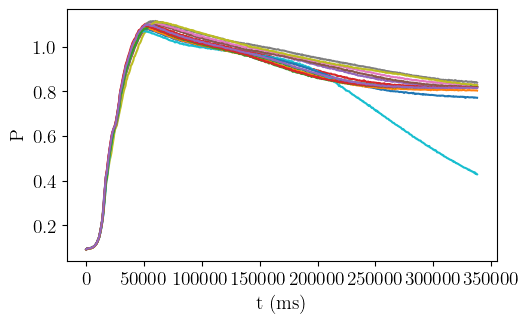

In [341]:
for i in range(N_exp):
    plt.plot(df1['Time [s]'],df1.iloc[:, 3+i])
plt.xlabel('t (ms)', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/Logistic_ED.png')
plt.savefig('../Img/411/Logistic_ED.pdf')
plt.savefig('../Img/411/Logistic_ED.svg')
plt.show()


In [342]:
c=-1
P_exp=np.array(df1.iloc[:, 3:].drop('H1',axis=1))[:c]
T_exp=np.array(df1['Time [s]'])[:c]

T_max=max(T_exp)
T_exp=T_exp/max(T_exp)
N_exp=P_exp.shape[1]
N_exp,T_max

(14, 337235.3)

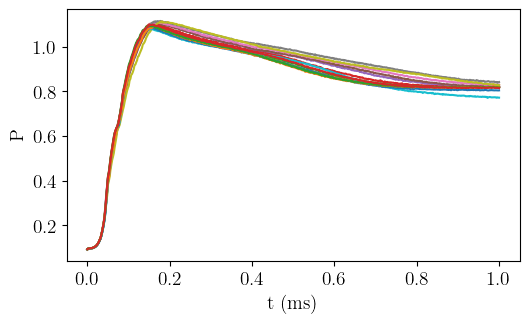

In [343]:

for i in range(N_exp):
    plt.plot(T_exp,P_exp[:, i])
plt.xlabel('t (ms)', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/Logistic_Norm_ED.png')
plt.savefig('../Img/411/Logistic_Norm_ED.pdf')
plt.savefig('../Img/411/Logistic_Norm_ED.svg')
plt.show()

In [344]:
N_f = 100 # Number of residual point
N_d = 300 #Number of data

u_star = P_exp.T.flatten().reshape([-1,1])
X_star = np.tile(T_exp,N_exp).reshape([-1,1])

# Doman bounds
lb = X_star.min(0)
ub = X_star.max(0)  

# Initial Condition
xx1 = X_star[::len(T_exp)]
uu1 = u_star[::len(T_exp)]

# Additional data
idx = np.random.choice(u_star.shape[0], N_d-len(uu1), replace=False)
xxd = X_star[idx]
uud = u_star[idx]

X_u_train = np.concatenate((xx1,xxd)).reshape([-1,1])
u_train = np.concatenate((uu1,uud)).reshape([-1,1])

X_f_train = lb + (ub-lb)*lhs(1, N_f)
# X_f_train = np.vstack((X_f_train, X_u_train))

X_u_train_tf = tf.convert_to_tensor(X_u_train, dtype=tf.float32)
u_train_tf =   tf.convert_to_tensor(u_train, dtype=tf.float32)
X_f_train_tf = tf.convert_to_tensor(X_f_train, dtype=tf.float32)
u_star_tf = tf.convert_to_tensor(u_star, dtype=tf.float32)

In [424]:
np.random.seed(seed=1234)
tf.random.set_seed(1234)
tf.config.experimental.enable_tensor_float_32_execution(False)
#os.environ[‘TF_ENABLE_AUTO_MIXED_PRECISION’] = ‘1’



# Initalization of Network
def hyper_initial(size):
    in_dim = size[0]
    out_dim = size[1]
    std = np.sqrt(2.0/(in_dim + out_dim))
    return tf.Variable(tf.random.truncated_normal(shape=size, stddev = std))

# Neural Network 
def DNN(X, W, b):
    A = 2.0*(X - lb)/(ub - lb) - 1.0
    L = len(W)
    for i in range(L-1):
        A = tf.tanh(tf.add(tf.matmul(A, W[i]), b[i]))
    Y = tf.add(tf.matmul(A, W[-1]), b[-1])
    return Y

def train_vars(W, b):
    return W + b 

def train_vars_total(W, b, lambda_r, lambda_b):
    return W + b + lambda_r + lambda_b

def net(t, w, b):
    p = DNN(t, w, b)
    return p

def loss_weight(N_r, N_b):
    alpha_b = tf.Variable(tf.reshape(tf.repeat(1000.0, N_b), (N_b, -1))) 
    alpha_r = tf.Variable(tf.ones(shape=[N_r, 1]), dtype=tf.float32)
    return alpha_r, alpha_b

#@tf.function(jit_compile=True)
@tf.function()
def net_f(t, W_p, b_p, W_phi, b_phi):
    with tf.GradientTape(persistent=True) as tape1:
        tape1.watch([t])
        p=net(t, W_p, b_p)
        phi=net(p, W_phi, b_phi)
    p_t = tape1.gradient(p, t) 
    f = p_t - phi
    return f


#@tf.function()
@tf.function()
def train_step(W_p, b_p, W_phi, b_phi, X_u_train_tf, u_train_tf, X_f_train_tf, lambda_r, lambda_b, opt):
    t_u = X_u_train_tf
    t_f = X_f_train_tf

    with tf.GradientTape(persistent=True) as tape:
        tape.watch([W_p, b_p, W_phi, b_phi, lambda_r, lambda_b])
        u_nn = net(t_u, W_p, b_p) 
        f_nn = net_f(t_f, W_p, b_p, W_phi, b_phi)
        loss_u = tf.square(lambda_b*(u_nn - u_train_tf))
        loss_f = tf.square(lambda_r*f_nn) 
        loss =  tf.reduce_mean(loss_u) + tf.reduce_mean(loss_f)
    grads_p = tape.gradient(loss, train_vars(W_p, b_p))
    grads_phi = tape.gradient(loss, train_vars(W_phi, b_phi))

    opt.apply_gradients(zip(grads_p, train_vars(W_p, b_p)))
    opt.apply_gradients(zip(grads_phi, train_vars(W_phi, b_phi)))
   
    return loss, tf.reduce_mean(tf.square(u_nn - u_train_tf)), tf.reduce_mean(tf.square(f_nn) )




# N_u = 100 # Number of Initial and Boundary data points


layers = [1, 50, 50, 1]

L = len(layers)
W_p = [hyper_initial([layers[l-1], layers[l]]) for l in range(1, L)] 
b_p = [tf.Variable(tf.zeros([1, layers[l]])) for l in range(1, L)]
W_phi = [hyper_initial([layers[l-1], layers[l]]) for l in range(1, L)] 
b_phi = [tf.Variable(tf.zeros([1, layers[l]])) for l in range(1, L)]

lambda_r, lambda_b = loss_weight(N_f, N_d)

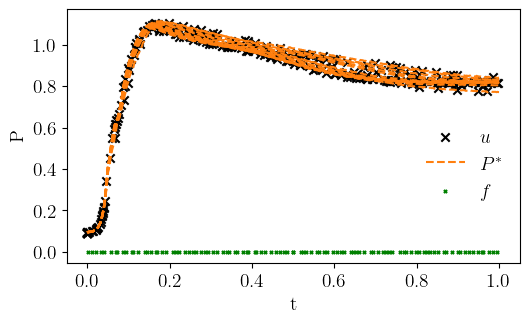

In [425]:
colors = plt.cm.tab10.colors

plt.scatter(X_u_train, u_train, marker='x', color='black',label='$u$')

plt.plot(X_star[:len(T_exp)],u_star[:len(T_exp)], color = colors[1], linestyle='--', label='$P^*$')

for i in range(1, N_exp):
    plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)], color = colors[1], linestyle='--')
plt.scatter(X_f_train_tf, np.zeros_like(X_f_train), marker='x', s=5, color='green',label='$f$')

plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.6))
plt.xlabel('t', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/u.png')
plt.savefig('../Img/411/u.pdf')
plt.savefig('../Img/411/u.svg')
# plt.savefig('figures/P_phi.pdf')
plt.show()

In [426]:
lr = 1e-4
Nmax = 6*10**4
# Nmax = 100000

optimizer = tf.optimizers.Adam(learning_rate=lr)

start_time = time.time()
n=0
loss = []
loss_u=[]
loss_f=[]
while n <= Nmax:
    loss_, loss_u_, loss_f_ = train_step(W_p, b_p, W_phi, b_phi, X_u_train_tf, u_train_tf, X_f_train_tf,  lambda_r, lambda_b, optimizer)
    loss.append(loss_)
    loss_u.append(loss_u_)
    loss_f.append(loss_f_)

    if n % 10 == 0:
        print(f"Iteration is: {n}")
        print(f"Total loss is: {loss_}")

        print(f"Data loss is: {loss_u_}")
        print(f"Physicial loss is: {loss_f_}")

    n+=1

elapsed = time.time() - start_time                
print('Training time: %.4f' % (elapsed))

Iteration is: 0
Total loss is: 753956.8125
Data loss is: 0.7539567351341248
Physicial loss is: 0.09417513012886047
Iteration is: 10
Total loss is: 726497.8125
Data loss is: 0.7264978289604187
Physicial loss is: 0.009679976850748062
Iteration is: 20
Total loss is: 696831.625
Data loss is: 0.6968316435813904
Physicial loss is: 0.004939851816743612
Iteration is: 30
Total loss is: 663575.6875
Data loss is: 0.6635756492614746
Physicial loss is: 0.005637805908918381
Iteration is: 40
Total loss is: 627124.5625
Data loss is: 0.6271246075630188
Physicial loss is: 4.749775325763039e-05
Iteration is: 50
Total loss is: 588169.25
Data loss is: 0.5881692171096802
Physicial loss is: 0.0007871005218476057
Iteration is: 60
Total loss is: 546613.625
Data loss is: 0.5466135740280151
Physicial loss is: 0.00024796652724035084
Iteration is: 70
Total loss is: 502719.3125
Data loss is: 0.5027192831039429
Physicial loss is: 0.00015128450468182564
Iteration is: 80
Total loss is: 456915.71875
Data loss is: 0.456

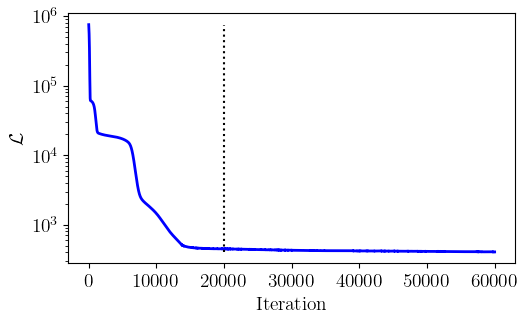

In [427]:
Nmax=len(loss)
it = np.arange(0,Nmax, 1)
loss_list = [loss[i].numpy() for i in range(0,Nmax)]
loss_u_list = [loss_u[i].numpy() for i in range(0,Nmax)]
loss_f_list = [loss_f[i].numpy() for i in range(0,Nmax)]



plt.semilogy(it, np.asarray(loss_list), 'b-', linewidth = 2, label = 'Total')  
# plt.semilogy(it, np.asarray(loss_phi_list), 'r-', linewidth = 2, label = '$\mathcal{L}_\phi$')     
# plt.semilogy(it, np.asarray(loss_u_list), 'y-', linewidth = 2, label = '$\mathcal{L}_u$')    
# plt.semilogy(it, np.asarray(loss_f_list), 'g-', linewidth = 2, label = '$\mathcal{L}_f$')       


plt.vlines(2*10**4, min(loss_list), max(loss_list), color='black', linestyle=':')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\mathcal{L}$', fontsize=14)    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/Loss.png')
plt.savefig('../Img/411/Loss.pdf')
plt.savefig('../Img/411/Loss.svg')
plt.show()

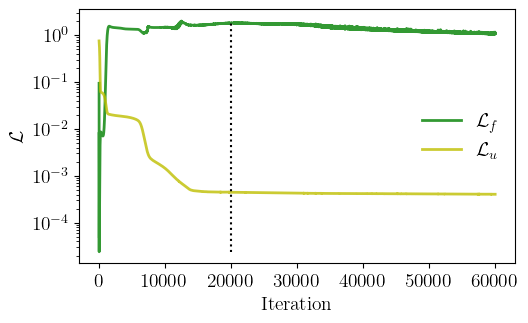

In [428]:
# plt.semilogy(it, np.asarray(loss_list), 'b-', linewidth = 2, label = 'Total')  
# plt.semilogy(it, np.asarray(loss_phi_list), 'r-', linewidth = 2, label = '$\mathcal{L}_\phi$') 
plt.semilogy(it, np.asarray(loss_f_list), 'g-', linewidth = 2, alpha=0.8,    label = '$\mathcal{L}_f$') 
plt.semilogy(it, np.asarray(loss_u_list), 'y-', linewidth = 2, alpha=0.8,   label = '$\mathcal{L}_u$')    



plt.vlines(2*10**4, min(loss_f_list), max(loss_f_list),  color='black', linestyle=':')

plt.legend(fontsize=14, frameon=False,)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\mathcal{L}$', fontsize=14)    
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/Loss_split.png')
plt.savefig('../Img/411/Loss_split.pdf')
plt.savefig('../Img/411/Loss_split.svg')
plt.show()

In [350]:
def predict(X_star_tf, w, b):
    x_star = X_star_tf
    u_pred = net(x_star, w, b)
    return u_pred

## Evaluating total function
X_star_tf = tf.convert_to_tensor(X_star[:len(T_exp)], dtype=tf.float32)    
u_pred = predict(X_star_tf, W_p, b_p)

## Evaluating unknown function
u_pred_tf = tf.convert_to_tensor(u_pred, dtype=tf.float32) 
phi_pred = predict(u_pred_tf, W_phi, b_phi)

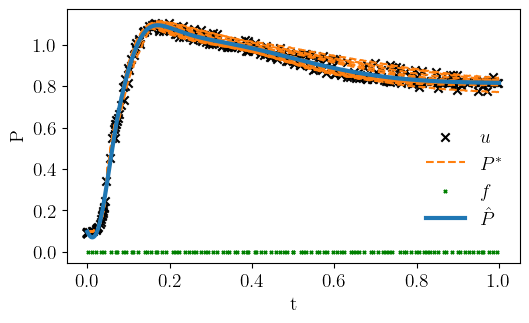

In [351]:
# for i in range(N_exp):
#     plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)],linestyle=':')

plt.scatter(X_u_train, u_train, marker='x', color='black',label='$u$')

plt.plot(X_star[:len(T_exp)],u_star[:len(T_exp)], color = colors[1], linestyle='--', label='$P^*$')

for i in range(1, N_exp):
    plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)], color = colors[1], linestyle='--')
plt.scatter(X_f_train_tf, np.zeros_like(X_f_train), marker='x', s=5, color='green',label='$f$')

plt.plot(X_star[:len(T_exp)], u_pred, linewidth=3, label='$\hat{P}$')

plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.6))
plt.xlabel('t', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/result.png')
plt.savefig('../Img/411/result.pdf')
plt.savefig('../Img/411/result.svg')
# plt.savefig('figures/P_phi.pdf')
plt.show()

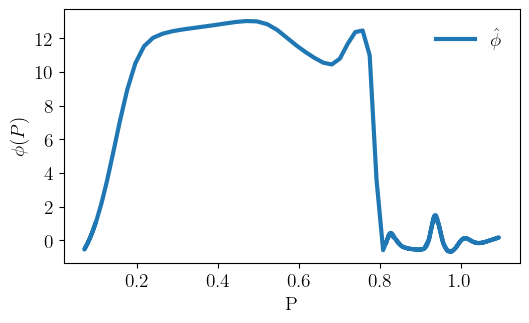

In [352]:
plt.plot(u_pred, phi_pred,linewidth=3, label='$\hat{\phi}$')
# plt.plot(P, phi_star, linewidth=3,linestyle='--', label='$\phi^*$')
# plt.scatter(X_f_train_tf, np.zeros_like(X_f_train), marker='x', s=5, color='green',label='$f$')

# plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.7))
plt.legend(fontsize=14, ncols=1, frameon=False)

plt.xlabel('P', fontsize=14)
plt.ylabel('$\phi(P)$', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
# plt.savefig('../Img/411/Result_phi.png')
# plt.savefig('../Img/411/Result_phi.pdf')
# plt.savefig('../Img/411/Result_phi.svg')
plt.show()

In [60]:
Nt=10000
T_int=np.zeros(Nt)
P_int=np.zeros(Nt)
dt=0.0001

T_int[0]=0
P_int[0]=np.mean(uu1) #Initial conditions

for i in range(1,Nt):
    P_int[i]=P_int[i-1]+predict(tf.convert_to_tensor(np.reshape(P_int[i-1],[-1,1]), dtype=tf.float32) , W_phi, b_phi)*dt
    T_int[i]=T_int[i-1]+dt

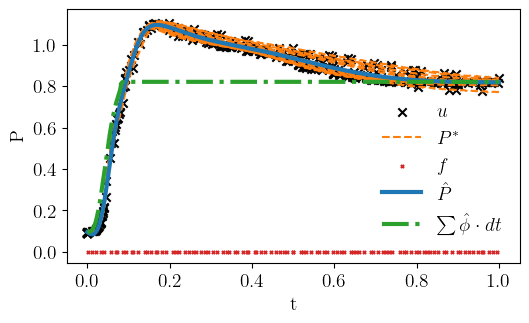

In [89]:
# for i in range(N_exp):
#     plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)],linestyle=':')

plt.scatter(X_u_train, u_train, marker='x', color='black',label='$u$')

plt.plot(X_star[:len(T_exp)],u_star[:len(T_exp)], color = colors[1], linestyle='--', label='$P^*$')

for i in range(1, N_exp):
    plt.plot(X_star[i*len(T_exp):(i+1)*len(T_exp)],u_star[i*len(T_exp):(i+1)*len(T_exp)], color = colors[1], linestyle='--')
plt.scatter(X_f_train_tf, np.zeros_like(X_f_train), marker='x', s=5, color=colors[3] ,label='$f$')

plt.plot(X_star[:len(T_exp)], u_pred, linewidth=3, label='$\hat{P}$')
plt.plot(T_int, P_int, linestyle='-.', color=colors[2], linewidth=3, label='$\sum \hat{\phi} \cdot dt$')

plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.7))
plt.xlabel('t', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/result_all.png')
plt.savefig('../Img/411/result_all.pdf')
plt.savefig('../Img/411/result_all.svg')
# plt.savefig('figures/P_phi.pdf')
plt.show()

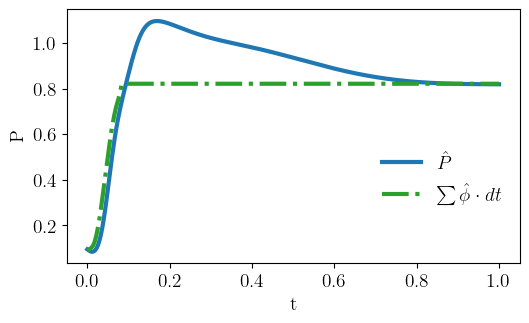

In [61]:


plt.plot(X_star[:len(T_exp)], u_pred, linewidth=3, label='$\hat{P}$')
# plt.plot(T, u_pred, linewidth=3, label='$\hat{P}$')
# plt.plot(T, P, linestyle='--',linewidth=3, label='$P^*$')
plt.plot(T_int, P_int, linestyle='-.', color=colors[2], linewidth=3, label='$\sum \hat{\phi} \cdot dt$')

plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.5))
plt.xlabel('t', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 


plt.tight_layout()
plt.savefig('../Img/411/Result_int.png')
plt.savefig('../Img/411/Result_int.pdf')
plt.savefig('../Img/411/Result_int.svg')
plt.show()

In [ ]:
# Create and train the PySR model
model= PySRRegressor(
    niterations=500,
    binary_operators=["+", "*", "inv(x, y) = x/(x + y)"],
    # unary_operators=["inv(x) = 1/x"],
    # unary_operators=["exp","inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x, y: x/(x+y),},
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    complexity_of_variables=1,
    complexity_of_constants=1,
    complexity_of_operators={"inv": 3},
    parsimony=0.000001,
    maxsize=30,
    progress=True  # Show progress during training
)

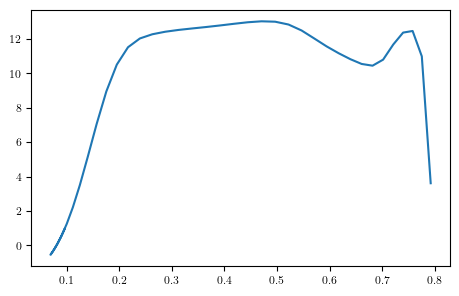

In [373]:
plt.plot(u_pred_tf[:45], np.array(phi_pred)[:45])

In [385]:
# Fit phi
model.fit(u_pred_tf[:45], np.array(phi_pred)[:45])
print(model)

c:\Users\u256063\AppData\Local\anaconda3\envs\tf2.8\lib\site-packages\pysr\sr.py:1989: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
c:\Users\u256063\AppData\Local\anaconda3\envs\tf2.8\lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          2.1041996   
	1         0.643731                                     x0 * 19.834606   
	2         0.055925                       2.2660675 + (x0 * 15.506584)   
	3         0.433949                x0 * ((-46.689777 * x0) + 48.48944)   
	4         0.387746   -4.9406295 + (x0 * ((-79.07754 * x0) + 77.8029))   
	5         0.003078  -4.9708285 + ((78.21688 + ((-80.31465 + x0) * ...   
	6         0.329996  (((-306.58835 * inv(x0, 0.20055641)) + 274.854...   
	7         0.000622  (((273.51184 + x0) + (inv(x0, 0.20429851) * -3...   
	8         0.000444  -14.974418 + ((((272.2486 + x0) + x0) + (-307....   
	9         0.029299  -0.3773632 + ((((x0 + x0) * inv(3.717764 + (x0...   
	10  >>>>  0.385052  (((273.8592 + (-306.4287 * inv(x0, 0.20325212)...   
	11        0.008974  (-0.040160693 * inv(x0, -0.78622395)) + ((x0 *...   
	12      

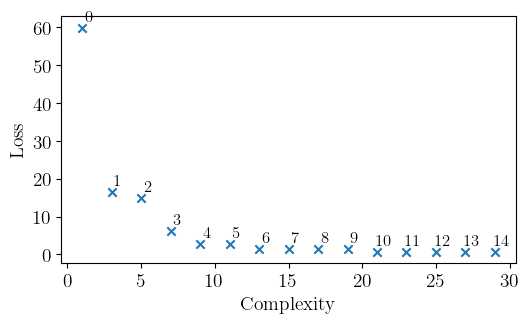

In [389]:
# Extraer las métricas de las ecuaciones
equations_df = model.equations_
# Obtener la complejidad y la puntuación (score) de cada ecuación
complejidades = equations_df['complexity']
errores = equations_df['loss']  # Por ejemplo, error MSE o cualquier métrica utilizada

# Crear el gráfico de dispersión
plt.scatter(complejidades, errores, marker='x')

# Añadir etiquetas de índice en cada punto
for i, (x, y) in enumerate(zip(complejidades, errores)):
    plt.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=12)

# Añadir etiquetas y título
plt.xlabel('Complexity', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('../Img/411/Loss_Complexity_2.png')
plt.savefig('../Img/411/Loss_Complexity_2.pdf')
plt.savefig('../Img/411/Loss_Complexity_2.svg')
# Mostrar gráfico
plt.show()

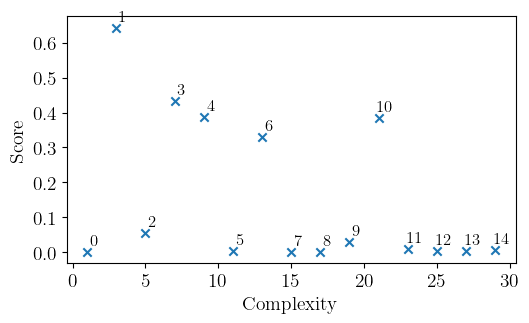

In [390]:
# Extraer complejidad y score
complejidades = equations_df['complexity']
scores = equations_df['score']

# Graficar score vs complejidad
plt.scatter(complejidades, scores, marker='x')

# Añadir etiquetas de índice en cada punto
for i, (x, y) in enumerate(zip(complejidades, scores)):
    plt.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=12)

# Añadir etiquetas y título
plt.xlabel('Complexity', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 
plt.tight_layout()
plt.savefig('../Img/411/Score_Complexity_2.png')
plt.savefig('../Img/411/Score_Complexity_2.pdf')
plt.savefig('../Img/411/Score_Complexity_2.svg')
# Mostrar gráfico
plt.show()


In [391]:
equations_df

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,59.986897,0.000000,2.1041996,2.10419960000000,PySRFunction(X=>2.10419960000000)
1,3,16.554610,0.643731,x0 * 19.834606,x0*19.834606,PySRFunction(X=>x0*19.834606)
2,5,14.802771,0.055925,2.2660675 + (x0 * 15.506584),x0*15.506584 + 2.2660675,PySRFunction(X=>x0*15.506584 + 2.2660675)
3,7,6.214693,0.433949,x0 * ((-46.689777 * x0) + 48.48944),x0*(48.48944 - 46.689777*x0),PySRFunction(X=>x0*(48.48944 - 46.689777*x0))
4,9,2.861722,0.387746,-4.9406295 + (x0 * ((-79.07754 * x0) + 77.8029)),x0*(77.8029 - 79.07754*x0) - 4.9406295,PySRFunction(X=>x0*(77.8029 - 79.07754*x0) - 4...
5,11,2.844161,0.003078,-4.9708285 + ((78.21688 + ((-80.31465 + x0) * ...,x0*(x0*(x0 - 80.31465) + 78.21688) - 4.9708285,PySRFunction(X=>x0*(x0*(x0 - 80.31465) + 78.21...
6,13,1.470020,0.329996,"(((-306.58835 * inv(x0, 0.20055641)) + 274.854...",x0*(274.85486 - 306.58835*x0/(x0 + 0.20055641)...,PySRFunction(X=>x0*(274.85486 - 306.58835*x0/(...
7,15,1.468193,0.000622,"(((273.51184 + x0) + (inv(x0, 0.20429851) * -3...",x0*(x0 + (x0/(x0 + 0.20429851))*(-307.07712) +...,PySRFunction(X=>x0*(x0 + (x0/(x0 + 0.20429851)...
8,17,1.466890,0.000444,-14.974418 + ((((272.2486 + x0) + x0) + (-307....,x0*(x0 + x0 - 307.76715*x0/(x0 + 0.20844008) +...,PySRFunction(X=>x0*(x0 + x0 - 307.76715*x0/(x0...
9,19,1.383402,0.029299,-0.3773632 + ((((x0 + x0) * inv(3.717764 + (x0...,(((x0*x0 + 3.717764)/(x0*x0 + 0.125535))*(x0 +...,PySRFunction(X=>(((x0*x0 + 3.717764)/(x0*x0 + ...


In [280]:
import sympy


In [ ]:
for i in range(len(equations_df)):
    print(i, sympy.expand(model.sympy(i)))

0 2.10419960000000
1 19.834606*x0
2 15.506584*x0 + 2.2660675
3 x0*(48.48944 - 46.689777*x0)
4 -x0*(79.07754*x0 - 77.8029) - 4.9406295
5 x0*(x0*(x0 - 80.31465) + 78.21688) - 4.9708285
6 (-31.73349*x0**2 + 40.1394989926526*x0 - 3.00521847278605)/(1.0*x0 + 0.20055641)
7 (x0*(-307.07712*x0 + (x0 + 0.20429851)*(x0 + 273.51184)) - 14.969931*x0 - 3.05833459810281)/(x0 + 0.20429851)
8 (2.0*x0**3 - 35.10166984*x0**2 + 41.773101963888*x0 - 3.12126888587344)/(1.0*x0 + 0.20844008)
9 (-9.575653401586*x0**2 + 4.215212*x0*(x0**2 + 3.717764) - 1.2020796497681)/(x0**2 + 0.125535)
10 (-32.5695*x0**3 + 66.252182510554*x0**2 - 35.0399933362823*x0 + 2.394295219359)/(1.0*x0**2 - 0.58304378*x0 - 0.159816308622308)
11 (1.0*x0**4 - 33.35572395*x0**3 + 65.803659058045*x0**2 - 34.6640391713472*x0 + 2.37496872156052)/(1.0*x0**2 - 0.58459335*x0 - 0.15852680677287)
12 (1.0*x0**5 - 0.58459335*x0**4 - 32.7280268067729*x0**3 + 65.803659058045*x0**2 - 34.6640391713472*x0 + 2.37496872156052)/(1.0*x0**2 - 0.58459335*x0 -

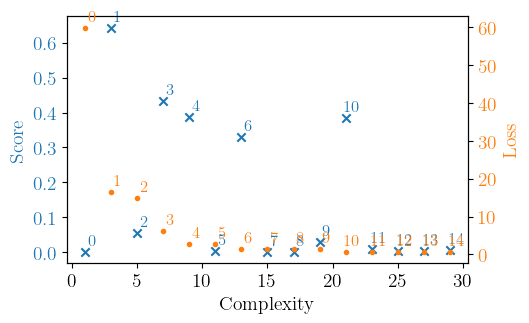

In [393]:
import matplotlib.pyplot as plt

# Obtener los colores de la paleta tab10
colors = plt.get_cmap('tab10').colors

# Crear la figura y el primer eje (izquierdo)
fig, ax1 = plt.subplots()

# Graficar score vs complejidad en el eje izquierdo usando el color tab10[0]
ax1.scatter(complejidades, scores, color=colors[0], marker='x', label='Score')
ax1.set_xlabel('Complexity', fontsize=14)
ax1.set_ylabel('Score', fontsize=14, color=colors[0])
ax1.tick_params(axis='y', labelcolor=colors[0])

# Añadir etiquetas de índice en cada punto para score
for i, (x, y) in enumerate(zip(complejidades, scores)):
    ax1.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=12, color=colors[0])

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

# Crear un segundo eje (derecho) que comparte el eje x
ax2 = ax1.twinx()

# Graficar errores vs complejidad en el eje derecho usando el color tab10[1]
ax2.scatter(complejidades, errores, color=colors[1], s=9, marker='o', label='Loss')
ax2.set_ylabel('Loss', fontsize=14, color=colors[1])
ax2.tick_params(axis='y', labelcolor=colors[1])

# Añadir etiquetas de índice en cada punto para errores
for i, (x, y) in enumerate(zip(complejidades, errores)):
    ax2.annotate(i, (x, y), textcoords="offset points", xytext=(5,5), ha='center', fontsize=12, color=colors[1])

# Ajustar el gráfico para que no se corten los elementos
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('../Img/411/Score_Loss_Complexity_2.png')
plt.savefig('../Img/411/Score_Loss_Complexity_2.pdf')
plt.savefig('../Img/411/Score_Loss_Complexity_2.svg')
plt.show()


In [407]:
choose=3
choose_2=4
choose_3=6

exp=model.sympy(choose)
exp_2=model.sympy(choose_2)
exp_3=model.sympy(choose_3)


In [408]:
sympy.expand(exp)


-46.689777*x0**2 + 48.48944*x0

In [409]:
sympy.expand(exp_2)


-79.07754*x0**2 + 77.8029*x0 - 4.9406295

In [410]:
sympy.expand(exp_3)


-306.58835*x0**2/(x0 + 0.20055641) + 274.85486*x0 - 14.984405

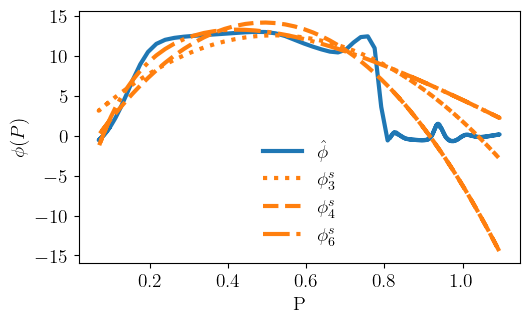

In [422]:
symb1=model.predict(u_pred,choose)
symb2=model.predict(u_pred,choose_2)
symb3=model.predict(u_pred,choose_3)


plt.plot(u_pred, phi_pred,linewidth=3, label='$\hat{\phi}$')
# plt.plot(P, phi_star, linewidth=3,linestyle='--', label='$\phi^*$')
plt.plot(u_pred, symb1,linewidth=3, color=colors[1], linestyle=':', label='$\phi^s_3$')
plt.plot(u_pred, symb2,linewidth=3, color=colors[1],linestyle='--', label='$\phi^s_4$')
plt.plot(u_pred, symb3,linewidth=3, color=colors[1],linestyle='-.', label='$\phi^s_6$')



plt.legend(fontsize=14, ncols=1, frameon=False)

plt.xlabel('P', fontsize=14)
plt.ylabel('$\phi(P)$', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.tight_layout()
plt.savefig('../Img/411/Result_phi_s_2.png')
plt.savefig('../Img/411/Result_phi_s_2.pdf')
plt.savefig('../Img/411/Result_phi_s_2.svg')
plt.show()


In [403]:
Nt=10000
P_symb_1=np.zeros(Nt)
P_symb_2=np.zeros(Nt)
P_symb_3=np.zeros(Nt)
T_symb=np.zeros(Nt)
dt=0.0001

P_symb_1[0]=P_symb_2[0]=P_symb_3[0]=np.mean(uu1) #Initial conditions
T_symb[0]=0

for i in range(1,Nt):
    P_symb_1[i]=P_symb_1[i-1]+model.predict(np.reshape(P_symb_1[i-1],[-1,1]),choose)*dt
    P_symb_2[i]=P_symb_2[i-1]+model.predict(np.reshape(P_symb_2[i-1],[-1,1]),choose_2)*dt
    P_symb_3[i]=P_symb_3[i-1]+model.predict(np.reshape(P_symb_3[i-1],[-1,1]),choose_3)*dt

    T_symb[i]=T_symb[i-1]+dt

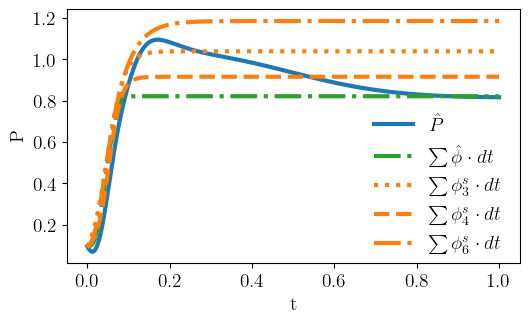

In [423]:
plt.plot(X_star[:len(T_exp)], u_pred, linewidth=3, label='$\hat{P}$')
# plt.plot(T, P, linestyle='--',linewidth=3, label='$P^*$')
plt.plot(T_int, P_int, color=colors[2], linestyle='-.',linewidth=3, label='$\sum \hat{\phi} \cdot dt$')
plt.plot(T_symb, P_symb_1, color=colors[1],linestyle=':',linewidth=3, label='$\sum \phi^s_3 \cdot dt$')
plt.plot(T_symb, P_symb_2, color=colors[1],linestyle='--',linewidth=3, label='$\sum \phi^s_4 \cdot dt$')
plt.plot(T_symb, P_symb_3, color=colors[1],linestyle='-.',linewidth=3, label='$\sum \phi^s_6 \cdot dt$')



plt.legend(fontsize=14, ncols=1, frameon=False,  bbox_to_anchor=(1, 0.65))
plt.xlabel('t', fontsize=14)
plt.ylabel('P', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 


plt.tight_layout()
plt.savefig('../Img/411/Result_int_s_2.png')
plt.savefig('../Img/411/Result_int_s_2.pdf')
plt.savefig('../Img/411/Result_int_s_2.svg')
plt.show()